<a href="https://colab.research.google.com/github/Vilars/Data-201/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The vgsale sourced from Kaggle contains information on video game sales. the data has 11 columns and 16598 rows and covers game from 1980 t0 2020. The dataset includes detailed sales figures for North America, Europe, Japan, and other regions, along with global sales.
which are the top publishers?
Which platform has the most sales?
How do sale vary across genre?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data-201/refs/heads/main/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [4]:
df['Year'] = df['Year'].fillna(df['Year'].median())
df = df.dropna()
df.head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


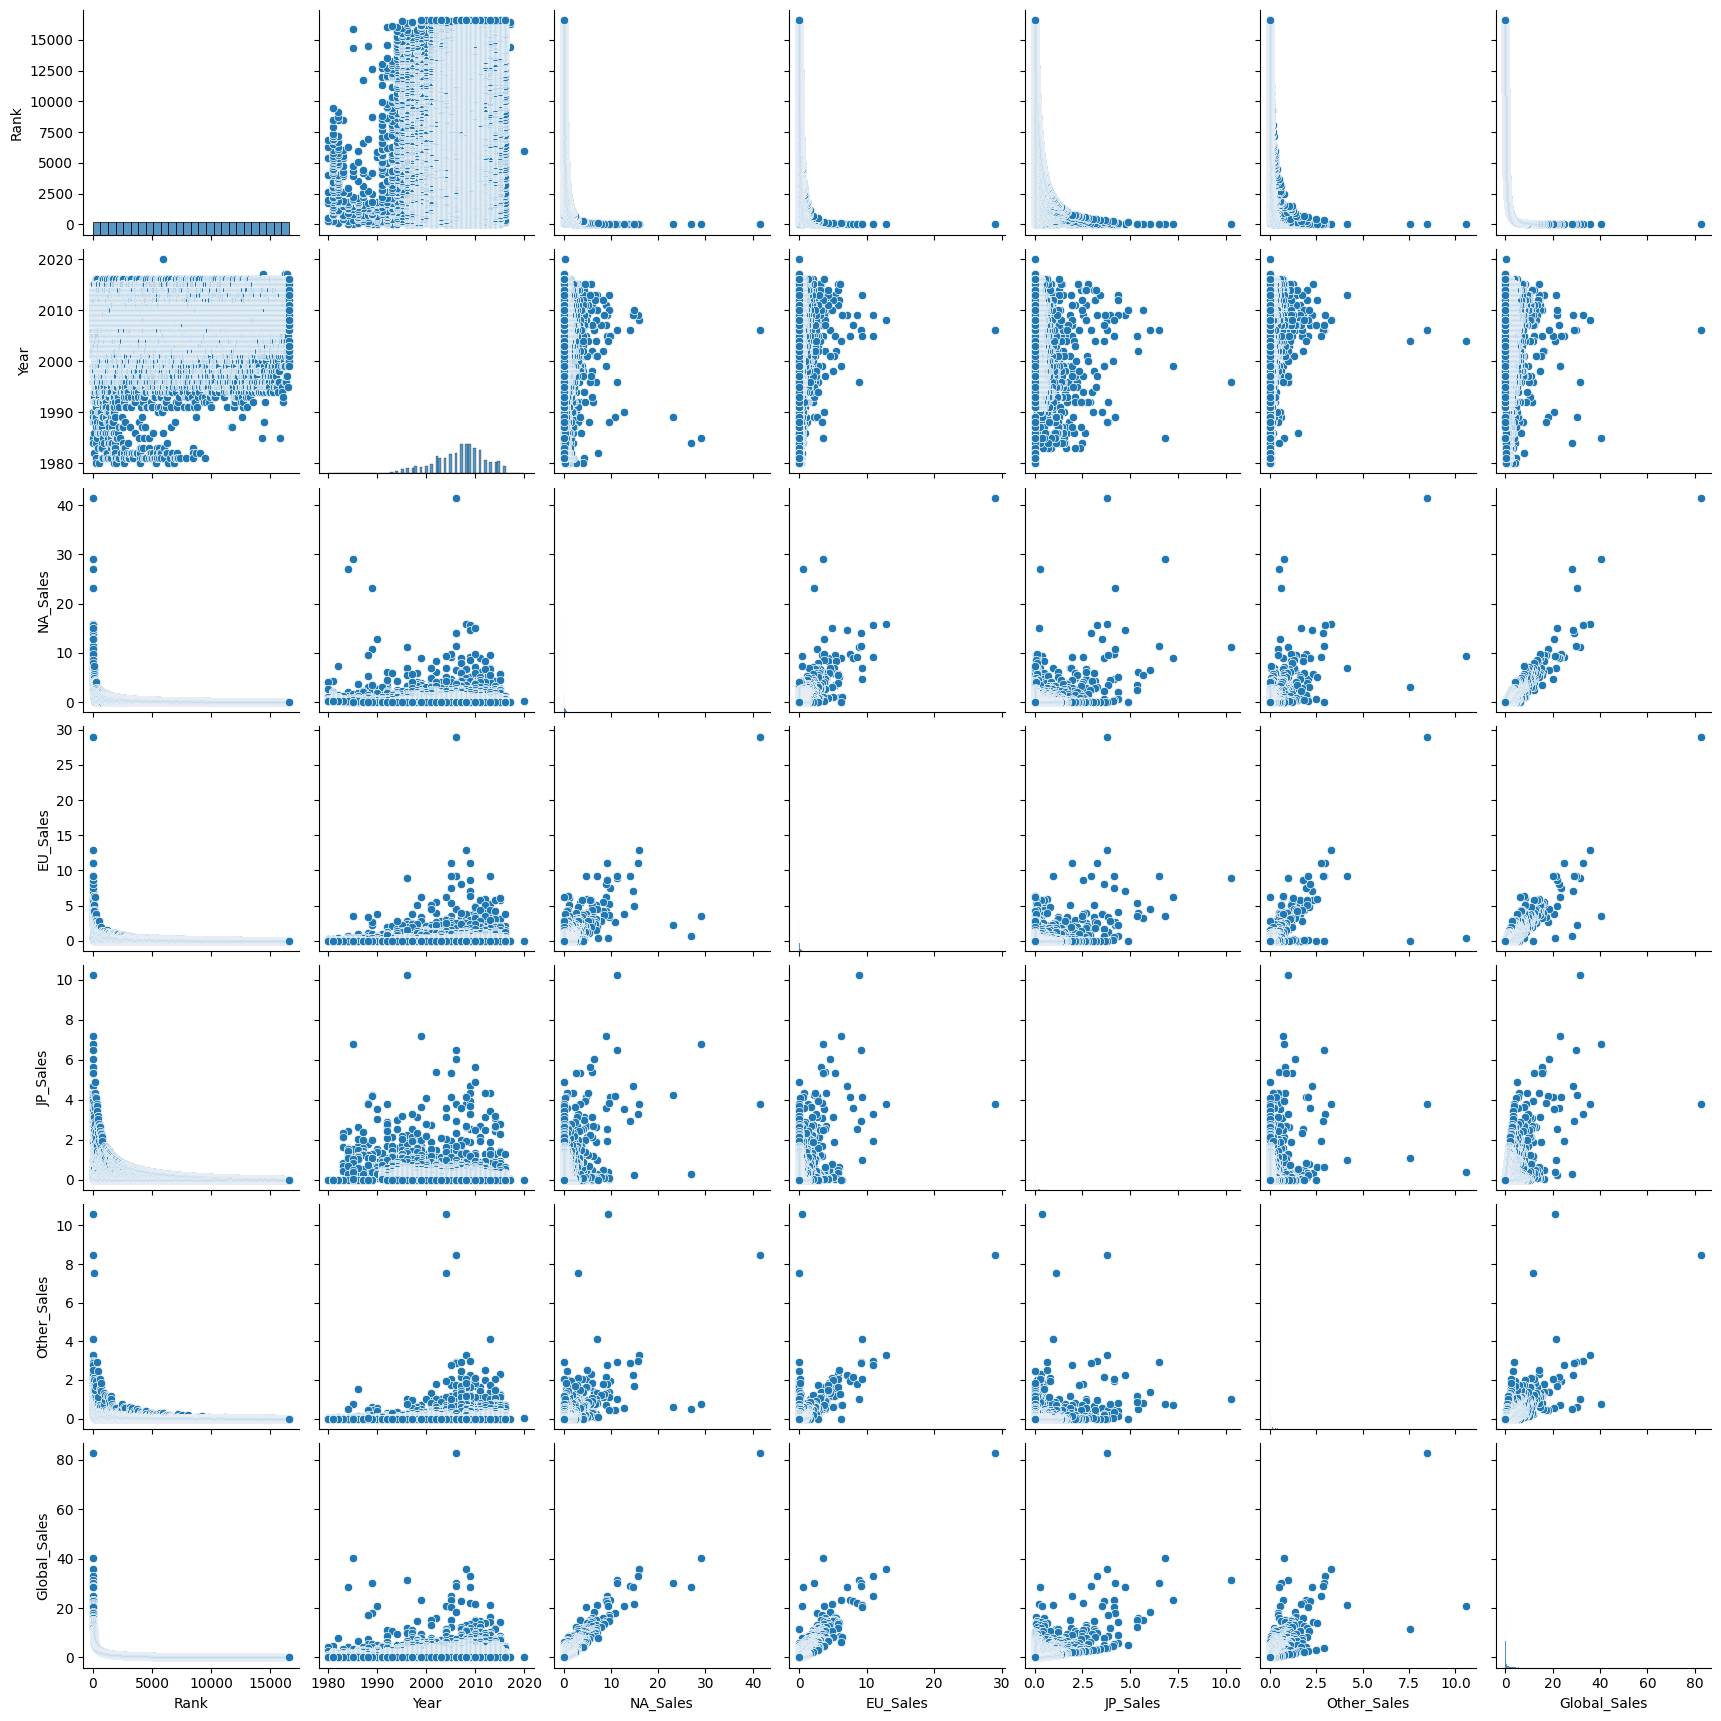

In [ ]:
# pairplot
sns.pairplot(df)
plt.show()

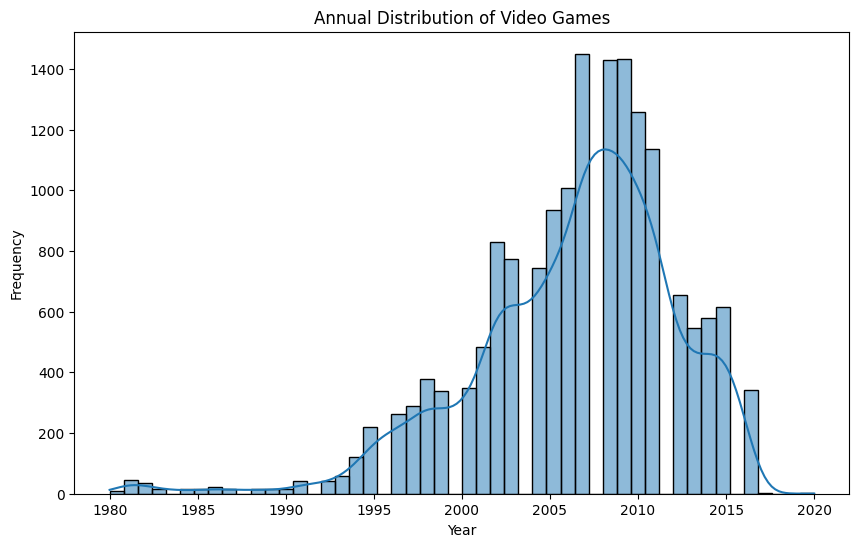

In [5]:
# Histogram of annual distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde = True, bins = 50)
plt.title('Annual Distribution of Video Games')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

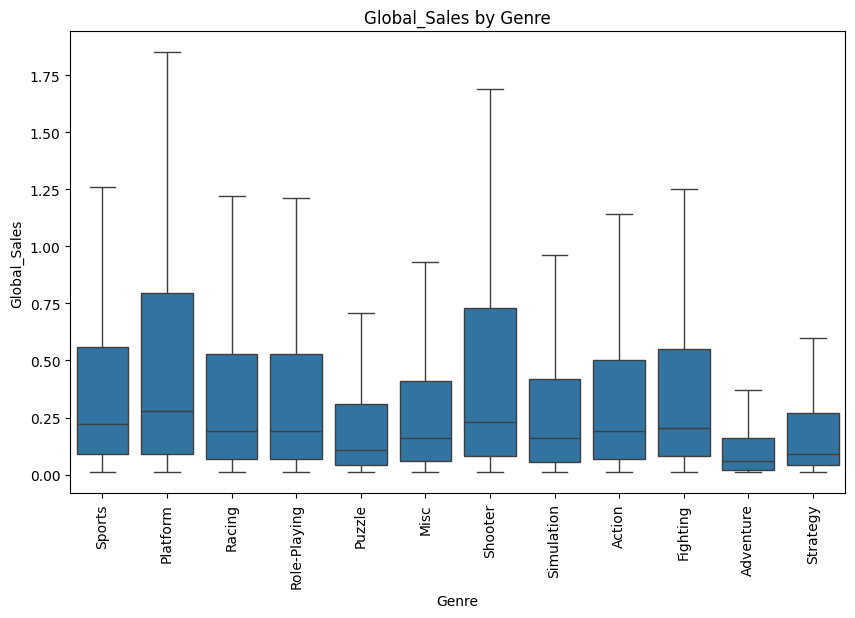

In [6]:
# Global sale by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df, showfliers=False)
plt.title('Global_Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global_Sales')
plt.xticks(rotation = 90)
plt.show()

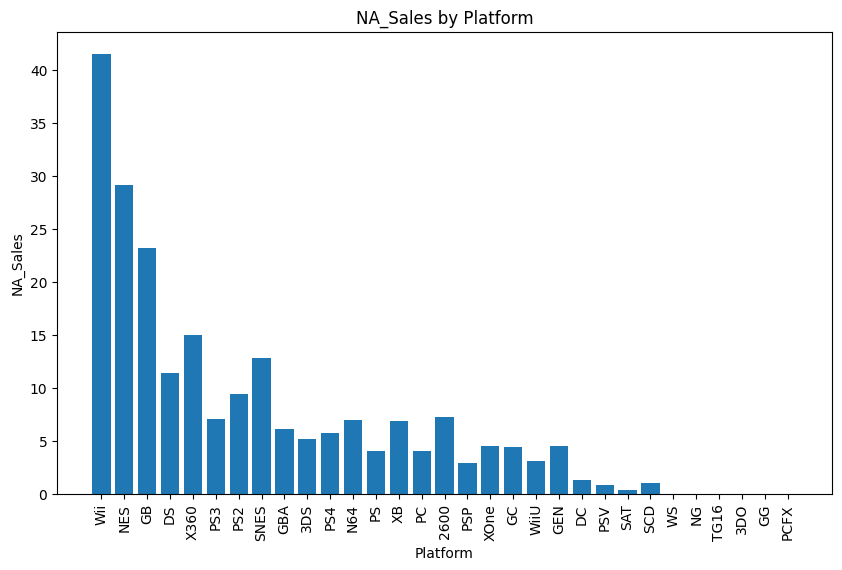

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(df['Platform'], df['NA_Sales'])
plt.title('NA_Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('NA_Sales')
plt.xticks(rotation=90)
plt.show()

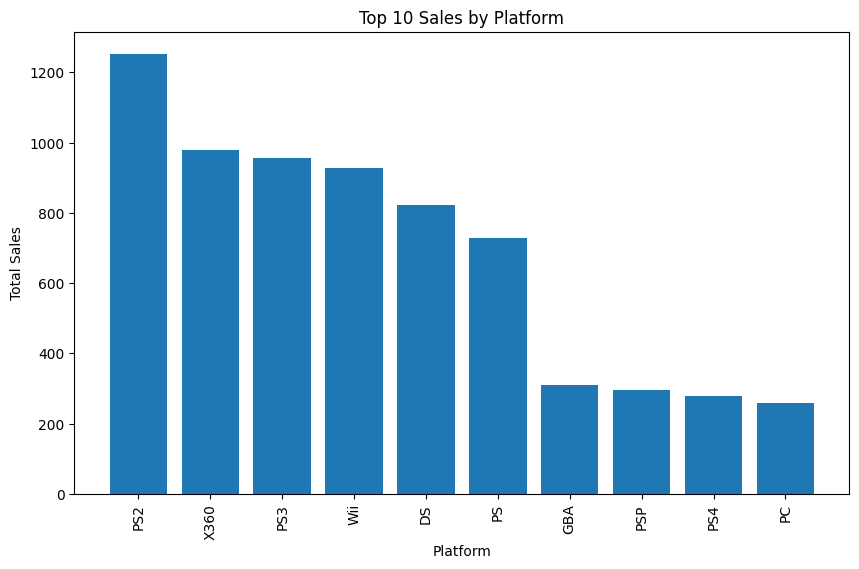

In [8]:
# Top 10 sale by platform
plt.figure(figsize=(10, 6))

top_10_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)

plt.bar(top_10_platforms.index, top_10_platforms.values)
plt.title('Top 10 Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games')])

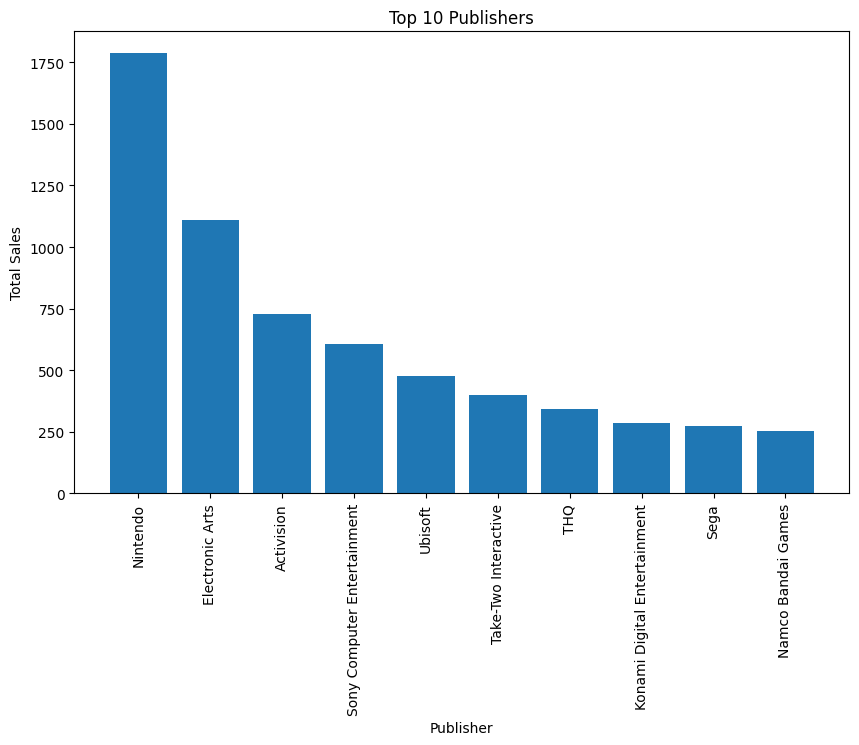

In [9]:
# Bar plot of top 10 publisher
plt.figure(figsize=(10, 6))
top_10_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
plt.bar(top_10_publishers.index, top_10_publishers.values)
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [15]:
X = df[['Genre', 'Platform', 'Publisher']]
y = df['Global_Sales']

X = pd.get_dummies(X, columns=['Genre', 'Platform', 'Publisher'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3.7464314744790577


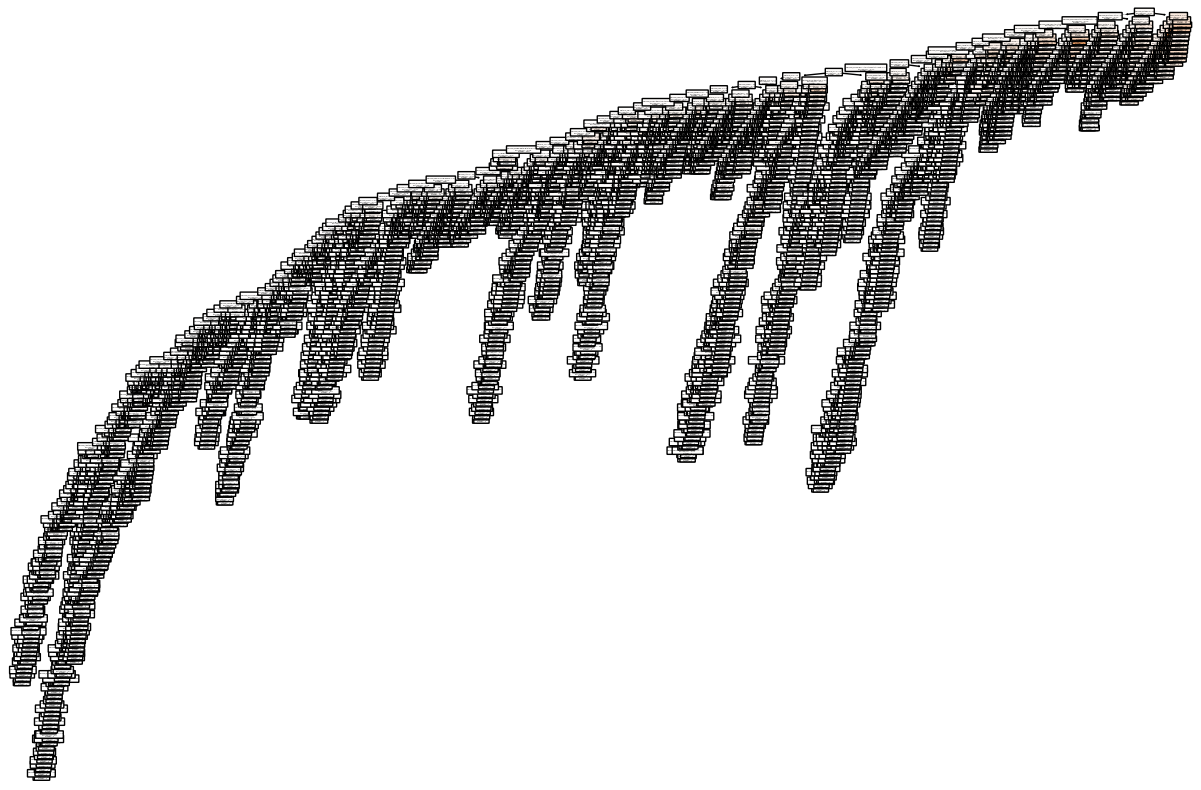

In [24]:
# Plot the tree with tree.plot_tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()